In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Basic Data Overview

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   State_Florida    50 non-null     float64
 5   State_New York   50 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000


In [11]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
Profit,0
State_Florida,0
State_New York,0


In [12]:
df.duplicated().sum()

np.int64(0)

# Exploratory data analysis

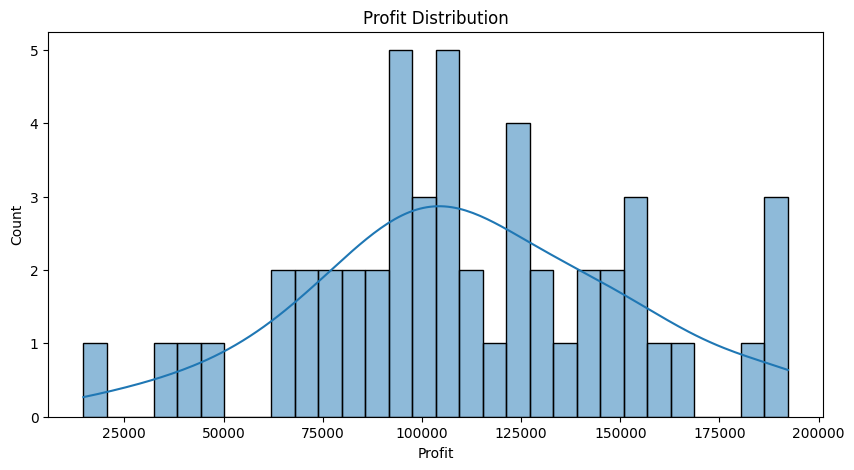

In [13]:
# Data Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Profit Distribution')
plt.show()

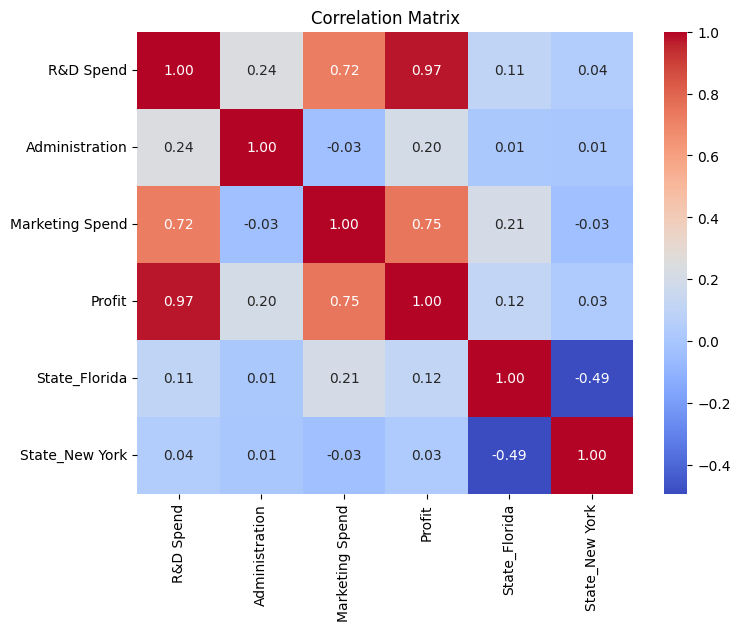

In [14]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

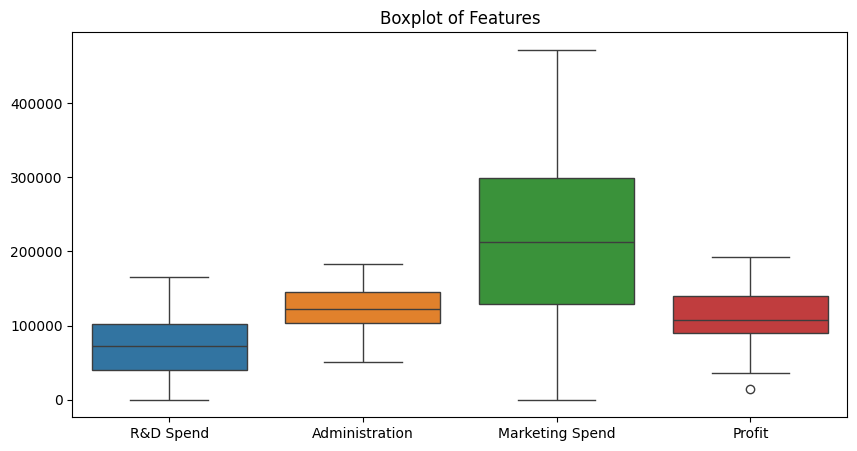

In [16]:
# Boxplot to Detect Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']])
plt.title('Boxplot of Features')
plt.show()

#Model building

In [ ]:
# Check for missing values
if df.isnull().sum().sum() > 0:
    df.fillna(df.mean(), inplace=True)  # Handling missing values

# Handle categorical variables
categorical_columns = ["State"]
encoder = OneHotEncoder(drop="first", sparse_output=False) # Replace 'sparse' with 'sparse_output'
categorical_data = encoder.fit_transform(df[categorical_columns])
categorical_df = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_columns))

# Merge encoded features with original data
df = df.drop(columns=categorical_columns).reset_index(drop=True)
df = pd.concat([df, categorical_df], axis=1)

# Define features and target
X = df.drop(columns=["Profit"])  # Replace "Profit" with the actual target variable name
y = df["Profit"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Multiple Linear Regression ---
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

y_pred = mlr_model.predict(X_test)
print("MLR R2 Score:", r2_score(y_test, y_pred))
print("MLR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# --- Logistic Regression (for classification tasks) ---
# Convert y into binary (if needed for logistic regression)
y_class = (y > y.median()).astype(int)  # Example: classify as high/low profit

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# --- Neural Network Model (if classification task) ---
nn_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

loss, acc = nn_model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", acc)

In [18]:
loss, acc = nn_model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9000 - loss: 0.4194
Neural Network Accuracy: 0.8999999761581421
